<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Gsm/blob/main/Analytics_Resource_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the Data

In [462]:
# import the customer table
customer_df = pd.read_excel('/content/drive/MyDrive/DATA/2021_senior_product_analyst_business_challenge.xlsx', sheet_name='customer')

# import the revenue table
revenue_df = pd.read_excel('/content/drive/MyDrive/DATA/2021_senior_product_analyst_business_challenge.xlsx', sheet_name='revenue')

# import the usage table
usage_df = pd.read_excel('/content/drive/MyDrive/DATA/2021_senior_product_analyst_business_challenge.xlsx', sheet_name='usage')


In [463]:
customer_df.sample(5)

,cust_no,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
776,777,48,202008,202011.0,singtel,singtel,local
28,29,31,202106,NaN,new number,NaN,local
747,748,30,201712,201906.0,new number,singtel,non-local
286,287,48,201904,201909.0,new number,terminated,local
500,501,33,201901,202005.0,starhub,starhub,local


In [464]:
revenue_df.sample(5)

,cust_no,usagemonth,Base,Boost,PayG,Plus,Total bill
58,67,202106,NaN,NaN,28.00,2.0,30.00
4363,26,202011,28.0,NaN,NaN,40.0,68.00
1445,366,202107,NaN,NaN,28.00,20.0,48.00
4479,923,202010,28.0,NaN,NaN,10.0,38.00
5034,88,202012,28.0,NaN,0.15,NaN,28.15


In [465]:
usage_df.sample(5)

,cust_no,usagemonth,PayG_roaming_data_gb,Base/Plus_roaming_data_gb,PayG_local_data_gb,Base/Plus_local_data_gb,PayG_roaming_talktime_mins,Base/Plus_roaming_talktime_mins,PayG_local_talktime_mins,Base/Plus_local_talktime_mins,PayG_IDD_talktime_mins,Base/Plus_IDD_talktime_mins,PayG_roaming_SMS/MMS,Base/Plus_roaming_SMS/MMS,PayG_local_SMS/MMS,Base/Plus_local_SMS/MMS,PayG_IDD_SMS/MMS,Base/Plus_IDD_SMS/MMS
3600,860,202011,0.0,0.0,0,11.174004,0,0,0.0,62.0,0.0,0.0,0,0,0,0,0,0
583,49,202010,0.0,0.0,0,18.943096,0,0,0.0,85.0,0.0,0.0,0,0,0,0,0,0
2295,967,202104,0.0,0.0,0,31.040166,0,0,0.0,53.0,0.0,0.0,0,0,0,0,0,0
824,930,202010,0.0,0.0,0,5.598418,0,0,0.0,82.5,0.0,0.0,0,0,0,0,0,0
1894,473,202012,0.0,0.0,0,39.010059,0,0,0.0,23.0,0.0,0.0,0,0,0,0,0,0


# Filtering the DATA

In [466]:
# Select rows where usagemonth is within Jan-Jul 2021
usage_df_jan_jul = usage_df.loc[(usage_df['usagemonth'] >= 202101) & (usage_df['usagemonth'] <= 202107)]


In [467]:
usage_df_jan_jul.usagemonth.unique()

array([202101, 202102, 202103, 202104, 202105, 202106, 202107])

In [468]:
usage_df_jan_jul['Base/Plus_IDD_SMS/MMS'].value_counts()

0    3338
1     123
2      93
Name: Base/Plus_IDD_SMS/MMS, dtype: int64

In [469]:
usage_df_jan_jul = usage_df_jan_jul.drop(columns=['Base/Plus_roaming_SMS/MMS','PayG_local_data_gb'])

In [470]:
# usage_df_jan_jul.PayG_local_data_gb.nunique()

In [471]:
usage_df_jan_jul.shape

(3554, 16)

In [472]:
usage_df_jan_jul.columns

Index(['cust_no', 'usagemonth', 'PayG_roaming_data_gb',
       'Base/Plus_roaming_data_gb', 'Base/Plus_local_data_gb',
       'PayG_roaming_talktime_mins', 'Base/Plus_roaming_talktime_mins',
       'PayG_local_talktime_mins', 'Base/Plus_local_talktime_mins',
       'PayG_IDD_talktime_mins', 'Base/Plus_IDD_talktime_mins',
       'PayG_roaming_SMS/MMS', 'PayG_local_SMS/MMS', 'Base/Plus_local_SMS/MMS',
       'PayG_IDD_SMS/MMS', 'Base/Plus_IDD_SMS/MMS'],
      dtype='object')

In [473]:
usage_df_jan_jul.head()

,cust_no,usagemonth,PayG_roaming_data_gb,Base/Plus_roaming_data_gb,Base/Plus_local_data_gb,PayG_roaming_talktime_mins,Base/Plus_roaming_talktime_mins,PayG_local_talktime_mins,Base/Plus_local_talktime_mins,PayG_IDD_talktime_mins,Base/Plus_IDD_talktime_mins,PayG_roaming_SMS/MMS,PayG_local_SMS/MMS,Base/Plus_local_SMS/MMS,PayG_IDD_SMS/MMS,Base/Plus_IDD_SMS/MMS
3,737,202101,0.0,0.0,14.304980,0,0,0.0,98.0,0.0,0.0,0,0,0,0,0
4,737,202102,0.0,0.0,8.069600,0,0,0.0,56.0,1.0,0.0,0,0,3,5,0
5,737,202103,0.0,0.0,12.908936,0,0,0.0,99.0,0.0,0.0,0,0,2,0,0
6,737,202104,0.0,0.0,12.487324,0,0,0.0,97.0,0.0,0.0,0,0,0,0,0
7,737,202105,0.0,0.0,11.679531,0,0,0.0,86.0,0.0,0.0,0,0,0,0,0


In [474]:
usage_df_jan_jul.usagemonth.shape

(3554,)

In [475]:
# Grouping the data by month and customer number, and calculate the sum of each column
usage_df_jan_jul_grouped = usage_df_jan_jul.groupby(['usagemonth', 'cust_no']).sum().reset_index()

In [476]:
usage_df_jan_jul_grouped.sample(6)

,usagemonth,cust_no,PayG_roaming_data_gb,Base/Plus_roaming_data_gb,Base/Plus_local_data_gb,PayG_roaming_talktime_mins,Base/Plus_roaming_talktime_mins,PayG_local_talktime_mins,Base/Plus_local_talktime_mins,PayG_IDD_talktime_mins,Base/Plus_IDD_talktime_mins,PayG_roaming_SMS/MMS,PayG_local_SMS/MMS,Base/Plus_local_SMS/MMS,PayG_IDD_SMS/MMS,Base/Plus_IDD_SMS/MMS
3173,202107,259,0.0,0.0,107.413682,0,0,0.0,58.5,0.0,0.0,0,0,0,0,0
1276,202103,538,0.0,0.0,3.080156,0,0,0.0,922.5,0.0,0.0,0,0,0,0,0
1433,202103,865,0.0,0.0,9.911250,0,0,0.0,49.5,0.0,0.0,0,1,0,0,0
748,202102,490,0.0,0.0,8.824648,0,0,0.0,17.5,0.0,0.0,0,0,0,0,0
2885,202106,704,0.0,0.0,0.004404,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0
395,202101,798,0.0,0.0,8.077773,0,0,0.0,63.5,0.0,0.0,0,0,2,0,0


In [477]:
usage_df_jan_jul.shape,usage_df_jan_jul_grouped.shape

((3554, 16), (3554, 16))

In [478]:
usage_df_jan_jul_grouped

,usagemonth,cust_no,PayG_roaming_data_gb,Base/Plus_roaming_data_gb,Base/Plus_local_data_gb,PayG_roaming_talktime_mins,Base/Plus_roaming_talktime_mins,PayG_local_talktime_mins,Base/Plus_local_talktime_mins,PayG_IDD_talktime_mins,Base/Plus_IDD_talktime_mins,PayG_roaming_SMS/MMS,PayG_local_SMS/MMS,Base/Plus_local_SMS/MMS,PayG_IDD_SMS/MMS,Base/Plus_IDD_SMS/MMS
0,202101,2,0.0,0.0,158.159102,0,0,0.0,48.5,0.0,0.0,0,0,4,0,0
1,202101,3,0.0,0.0,0.085322,0,0,0.0,9.0,0.0,0.0,0,0,1,0,0
2,202101,6,0.0,0.0,4.637422,0,0,0.0,160.5,0.0,0.0,0,0,0,2,2
3,202101,7,0.0,0.0,3.419053,0,0,0.0,38.5,0.0,0.0,0,0,0,0,0
4,202101,8,0.0,0.0,14.957637,0,0,0.0,35.5,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,202107,989,0.0,0.0,8.840020,0,0,0.0,337.0,0.0,0.0,0,0,0,0,0
3550,202107,990,0.0,0.0,29.295146,0,0,0.0,96.0,0.0,0.0,0,0,2,0,0
3551,202107,995,0.0,0.0,70.435713,0,0,0.0,132.0,0.0,0.0,0,0,7,0,0
3552,202107,996,0.0,0.0,0.667500,0,0,0.0,25.0,0.0,0.0,0,0,0,0,0


In [479]:
usage_df_jan_jul_grouped.shape,revenue_df.shape

((3554, 16), (5122, 7))

In [480]:
usage_df_jan_jul_grouped.cust_no.nunique()

593

## WE have a total of 593 active customers from Jan-July 2021
 

## Merging the Data from other tables

In [481]:
merged_df = pd.merge(usage_df_jan_jul_grouped, revenue_df, on=['cust_no', 'usagemonth'], how='left')

merged_df.shape

(3554, 21)

In [482]:
merged_df.usagemonth.unique()

array([202101, 202102, 202103, 202104, 202105, 202106, 202107])

In [483]:
merged_df.head()

,usagemonth,cust_no,PayG_roaming_data_gb,Base/Plus_roaming_data_gb,Base/Plus_local_data_gb,PayG_roaming_talktime_mins,Base/Plus_roaming_talktime_mins,PayG_local_talktime_mins,Base/Plus_local_talktime_mins,PayG_IDD_talktime_mins,...,PayG_roaming_SMS/MMS,PayG_local_SMS/MMS,Base/Plus_local_SMS/MMS,PayG_IDD_SMS/MMS,Base/Plus_IDD_SMS/MMS,Base,Boost,PayG,Plus,Total bill
0,202101,2,0.0,0.0,158.159102,0,0,0.0,48.5,0.0,...,0,0,4,0,0,28.0,NaN,NaN,20.0,48.0
1,202101,3,0.0,0.0,0.085322,0,0,0.0,9.0,0.0,...,0,0,1,0,0,28.0,NaN,NaN,NaN,28.0
2,202101,6,0.0,0.0,4.637422,0,0,0.0,160.5,0.0,...,0,0,0,2,2,28.0,NaN,0.3,2.0,30.3
3,202101,7,0.0,0.0,3.419053,0,0,0.0,38.5,0.0,...,0,0,0,0,0,28.0,NaN,NaN,2.0,30.0
4,202101,8,0.0,0.0,14.957637,0,0,0.0,35.5,0.0,...,0,0,1,0,0,28.0,NaN,NaN,NaN,28.0


## MONTHLY REVENUE

In [484]:
monthly_revenue_1 = merged_df.groupby('usagemonth')['Total bill'].sum().reset_index()
monthly_revenue_1['usagemonth'] = monthly_revenue_1['usagemonth'].replace({202101: 'Jan', 202102: 'Feb', 202103: 'Mar', 202104: 'Apr', 202105: 'May', 202106: 'Jun', 202107: 'Jul'})
monthly_revenue_1

,usagemonth,Total bill
0,Jan,19406.8859
1,Feb,19247.8834
2,Mar,19541.9843
3,Apr,19603.5261
4,May,19486.8856
5,Jun,19716.0163
6,Jul,20070.8150


Text(0.5, 1.0, 'MONTHLY REVENUE')

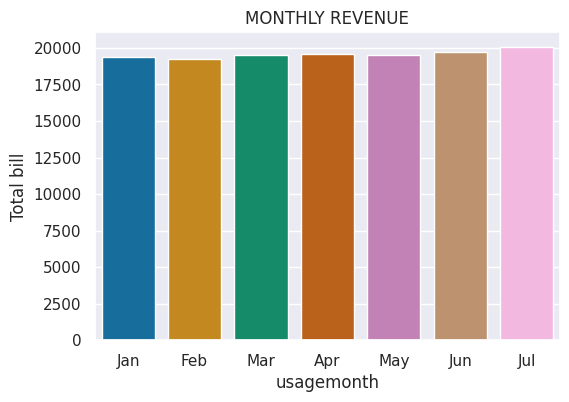

In [485]:
sns.barplot(x='usagemonth',y='Total bill',data=monthly_revenue_1)
plt.title('MONTHLY REVENUE')

In [486]:
# Merge the merged data with customer data on cust_no
final_df = pd.merge(merged_df, customer_df, on='cust_no', how='left')

In [487]:
final_df.columns

Index(['usagemonth', 'cust_no', 'PayG_roaming_data_gb',
       'Base/Plus_roaming_data_gb', 'Base/Plus_local_data_gb',
       'PayG_roaming_talktime_mins', 'Base/Plus_roaming_talktime_mins',
       'PayG_local_talktime_mins', 'Base/Plus_local_talktime_mins',
       'PayG_IDD_talktime_mins', 'Base/Plus_IDD_talktime_mins',
       'PayG_roaming_SMS/MMS', 'PayG_local_SMS/MMS', 'Base/Plus_local_SMS/MMS',
       'PayG_IDD_SMS/MMS', 'Base/Plus_IDD_SMS/MMS', 'Base', 'Boost', 'PayG',
       'Plus', 'Total bill', 'current_age', 'activation_month',
       'termination_month', 'portin_telco', 'portout_telco',
       'flag_local_singaporean'],
      dtype='object')

In [488]:
# final_df1=final_df.drop(['PayG_roaming_data_gb','Base/Plus_roaming_data_gb','PayG_local_data_gb'], axis=1)

In [489]:
final_df1=final_df

In [490]:
customer_total_bills = final_df1[['usagemonth','cust_no','Total bill']]

In [491]:
customer_total_bills = customer_total_bills.groupby(['usagemonth'])['Total bill'].mean().reset_index()
customer_total_bills['usagemonth'] = customer_total_bills['usagemonth'].replace({'2021-01-01': 'Jan', '2021-02-01': 'Feb', '2021-03-01': 'Mar', '2021-04-01': 'Apr', '2021-05-01': 'May', '2021-06-01': 'Jun', '2021-07-01': 'Jul'})
customer_total_bills

,usagemonth,Total bill
0,202101,38.659135
1,202102,38.495767
2,202103,38.468473
3,202104,38.895885
4,202105,38.818497
5,202106,38.432780
6,202107,38.746747


In [492]:
final_df_customer = final_df.groupby(['cust_no','usagemonth'])['Total bill'].sum().reset_index()
final_df_customer

,cust_no,usagemonth,Total bill
0,1,202106,10.0833
1,1,202107,48.9000
2,2,202101,48.0000
3,2,202102,48.4500
4,2,202103,77.2291
...,...,...,...
3549,999,202103,50.0000
3550,999,202104,50.0000
3551,999,202105,50.0000
3552,999,202106,50.0000


In [493]:
final_df.shape

(3554, 27)

In [494]:
final_df1.shape

(3554, 27)

In [495]:
final_df.cust_no.nunique()

593

In [496]:
final_df.to_excel('output.xlsx', index=False)

In [497]:
final_df['usagemonth'].unique()

array([202101, 202102, 202103, 202104, 202105, 202106, 202107])

In [498]:
final_df['usagemonth'] = pd.to_datetime(final_df['usagemonth'], format='%Y%m')


In [499]:
final_df1=final_df[['usagemonth', 'cust_no', 'Base/Plus_local_data_gb',
       'Base/Plus_local_talktime_mins', 'Base/Plus_local_SMS/MMS', 'Base',
       'Boost', 'PayG', 'Plus', 'Total bill', 'current_age',
       'activation_month', 'termination_month', 'portin_telco',
       'portout_telco', 'flag_local_singaporean']]

In [500]:
final_df1.columns

Index(['usagemonth', 'cust_no', 'Base/Plus_local_data_gb',
       'Base/Plus_local_talktime_mins', 'Base/Plus_local_SMS/MMS', 'Base',
       'Boost', 'PayG', 'Plus', 'Total bill', 'current_age',
       'activation_month', 'termination_month', 'portin_telco',
       'portout_telco', 'flag_local_singaporean'],
      dtype='object')

In [501]:
FINAL_MONTH_VIEW1 = final_df1[['usagemonth','Base/Plus_local_data_gb','Base/Plus_local_talktime_mins','Base/Plus_local_SMS/MMS','Base', 'Boost', 'PayG', 'Plus', 'Total bill', 'current_age']]


In [502]:
FINAL_MONTH_VIEW = final_df1[['usagemonth','Base/Plus_local_data_gb','Base/Plus_local_talktime_mins','Base/Plus_local_SMS/MMS','Base', 'Boost', 'PayG', 'Plus', 'Total bill', 'current_age']]
FINAL_MONTH_VIEW


,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age
0,2021-01-01,158.159102,48.5,4,28.0,NaN,NaN,20.0,48.0,20
1,2021-01-01,0.085322,9.0,1,28.0,NaN,NaN,NaN,28.0,19
2,2021-01-01,4.637422,160.5,0,28.0,NaN,0.3,2.0,30.3,27
3,2021-01-01,3.419053,38.5,0,28.0,NaN,NaN,2.0,30.0,34
4,2021-01-01,14.957637,35.5,1,28.0,NaN,NaN,NaN,28.0,25
...,...,...,...,...,...,...,...,...,...,...
3549,2021-07-01,8.840020,337.0,0,NaN,NaN,28.0,NaN,28.0,33
3550,2021-07-01,29.295146,96.0,2,NaN,NaN,28.0,20.0,48.0,24
3551,2021-07-01,70.435713,132.0,7,NaN,NaN,42.0,22.0,64.0,24
3552,2021-07-01,0.667500,25.0,0,NaN,NaN,28.0,NaN,28.0,56


In [503]:
final_df1.shape

(3554, 16)

# CHARTING FINAL VIEW

In [504]:
# FINAL_MONTH_VIEW

In [505]:
FINAL_MONTH_VIEW1 = FINAL_MONTH_VIEW.groupby('usagemonth').mean().reset_index()


In [506]:
# Group the data by month and calculate the mean of each column
FINAL_MONTH_VIEW = FINAL_MONTH_VIEW.groupby('usagemonth').mean().reset_index()

FINAL_MONTH_VIEW['usagemonth'] = FINAL_MONTH_VIEW['usagemonth'].replace({'2021-01-01': 'Jan', '2021-02-01': 'Feb', '2021-03-01': 'Mar', '2021-04-01': 'Apr', '2021-05-01': 'May', '2021-06-01': 'Jun', '2021-07-01': 'Jul'})

# Print the final monthly view of the key business metrics
print(FINAL_MONTH_VIEW)

  usagemonth  Base/Plus_local_data_gb  Base/Plus_local_talktime_mins  \
0        Jan                22.925448                     120.219384   
1        Feb                21.869797                     109.621178   
2        Mar                25.101206                     120.386837   
3        Apr                24.302196                     127.048515   
4        May                25.005376                     133.098410   
5        Jun                23.691603                     132.122626   
6        Jul                24.370751                     131.831252   

   Base/Plus_local_SMS/MMS       Base      Boost       PayG       Plus  \
0                 3.135189  28.171080  23.076962   6.583774  14.943522   
1                 2.415170   4.846158  11.583358  28.945766  15.033334   
2                 2.978389   4.846158   9.777800  28.787369  15.284769   
3                 2.722772   4.453846  13.285743  28.947868  15.551155   
4                 2.582505   3.736776  20.428657  28.

In [507]:
final_df1.sample(5)

,usagemonth,cust_no,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
726,2021-02-01,435,6.443838,22.5,0,NaN,36.0003,5.00,NaN,41.0003,65,202106,NaN,singtel,NaN,local
2254,2021-05-01,460,41.277949,680.0,4,NaN,5.0000,59.69,28.0,92.6900,31,201903,NaN,singtel,NaN,non-local
554,2021-02-01,104,75.818301,0.0,0,NaN,NaN,28.00,NaN,28.0000,35,202007,NaN,new number,NaN,local
2346,2021-05-01,656,24.296963,8.0,16,NaN,6.0000,28.00,2.0,36.0000,37,201907,202106.0,new number,terminated,non-local
1638,2021-04-01,252,35.740479,17.0,3,NaN,NaN,28.00,20.0,48.0000,24,202006,NaN,new number,NaN,local


In [508]:
FINAL_MONTH_VIEW

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age
0,Jan,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670
1,Feb,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607
2,Mar,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173
3,Apr,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505
4,May,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310
5,Jun,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374
6,Jul,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100


# Visuals

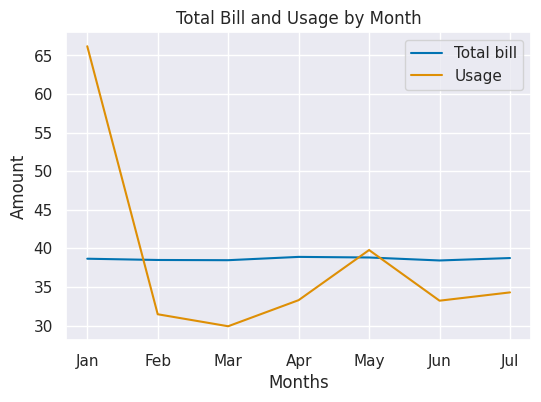

In [509]:
# plot the line graphs
plt.plot(FINAL_MONTH_VIEW['usagemonth'], FINAL_MONTH_VIEW['Total bill'], label='Total bill')
plt.plot(FINAL_MONTH_VIEW['usagemonth'], FINAL_MONTH_VIEW['Base'] + FINAL_MONTH_VIEW['Boost'] + FINAL_MONTH_VIEW['Plus'], label='Usage')
plt.legend()  # add a legend
plt.title('Total Bill and Usage by Month')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()


In [510]:
final_df1

,usagemonth,cust_no,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
0,2021-01-01,2,158.159102,48.5,4,28.0,NaN,NaN,20.0,48.0,20,202009,NaN,m1,NaN,local
1,2021-01-01,3,0.085322,9.0,1,28.0,NaN,NaN,NaN,28.0,19,202012,NaN,new number,NaN,local
2,2021-01-01,6,4.637422,160.5,0,28.0,NaN,0.3,2.0,30.3,27,201707,NaN,new number,NaN,local
3,2021-01-01,7,3.419053,38.5,0,28.0,NaN,NaN,2.0,30.0,34,201902,NaN,new number,NaN,non-local
4,2021-01-01,8,14.957637,35.5,1,28.0,NaN,NaN,NaN,28.0,25,201812,NaN,new number,NaN,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,2021-07-01,989,8.840020,337.0,0,NaN,NaN,28.0,NaN,28.0,33,202009,NaN,new number,NaN,local
3550,2021-07-01,990,29.295146,96.0,2,NaN,NaN,28.0,20.0,48.0,24,201902,NaN,starhub,NaN,local
3551,2021-07-01,995,70.435713,132.0,7,NaN,NaN,42.0,22.0,64.0,24,201708,NaN,new number,NaN,non-local
3552,2021-07-01,996,0.667500,25.0,0,NaN,NaN,28.0,NaN,28.0,56,202103,NaN,starhub,NaN,local


<ipython-input-511-73cfe60173f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df_monthly = final_df1.groupby('usagemonth').mean().reset_index()


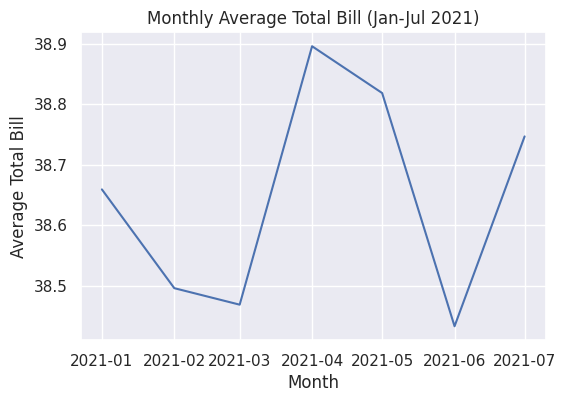

In [511]:
final_df_monthly = final_df1.groupby('usagemonth').mean().reset_index()

# Plot the monthly average total bill
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.lineplot(x="usagemonth", y="Total bill", data=final_df_monthly)
ax.set(xlabel='Month', ylabel='Average Total Bill', title='Monthly Average Total Bill (Jan-Jul 2021)')
plt.show()

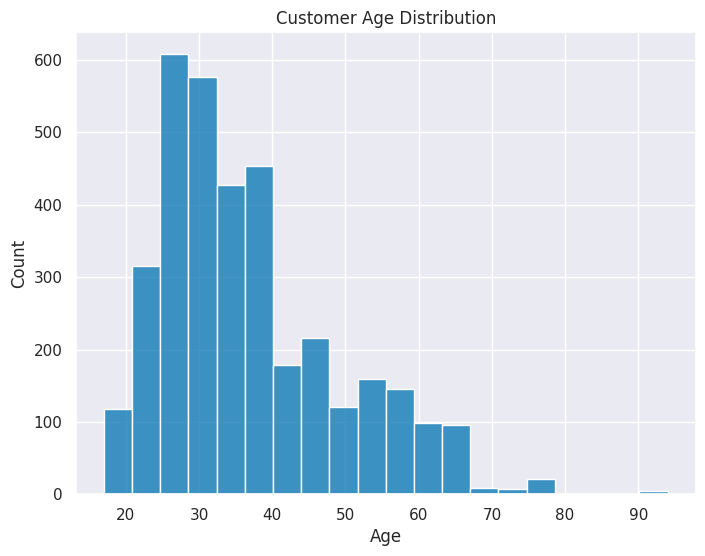

In [512]:
sns.set_palette('colorblind')
plt.figure(figsize=(8,6))
sns.histplot(x='current_age', data=final_df1, bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [513]:
customer_df.shape,revenue_df.shape,usage_df.shape

((1000, 7), (5122, 7), (5015, 18))

In [514]:
final_df1

,usagemonth,cust_no,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
0,2021-01-01,2,158.159102,48.5,4,28.0,NaN,NaN,20.0,48.0,20,202009,NaN,m1,NaN,local
1,2021-01-01,3,0.085322,9.0,1,28.0,NaN,NaN,NaN,28.0,19,202012,NaN,new number,NaN,local
2,2021-01-01,6,4.637422,160.5,0,28.0,NaN,0.3,2.0,30.3,27,201707,NaN,new number,NaN,local
3,2021-01-01,7,3.419053,38.5,0,28.0,NaN,NaN,2.0,30.0,34,201902,NaN,new number,NaN,non-local
4,2021-01-01,8,14.957637,35.5,1,28.0,NaN,NaN,NaN,28.0,25,201812,NaN,new number,NaN,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,2021-07-01,989,8.840020,337.0,0,NaN,NaN,28.0,NaN,28.0,33,202009,NaN,new number,NaN,local
3550,2021-07-01,990,29.295146,96.0,2,NaN,NaN,28.0,20.0,48.0,24,201902,NaN,starhub,NaN,local
3551,2021-07-01,995,70.435713,132.0,7,NaN,NaN,42.0,22.0,64.0,24,201708,NaN,new number,NaN,non-local
3552,2021-07-01,996,0.667500,25.0,0,NaN,NaN,28.0,NaN,28.0,56,202103,NaN,starhub,NaN,local


In [515]:
final = final_df1[['usagemonth','Base/Plus_local_data_gb','Base/Plus_local_talktime_mins','Base/Plus_local_SMS/MMS','Base', 'Boost', 'PayG', 'Plus', 'Total bill', 'current_age']]
final


,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age
0,2021-01-01,158.159102,48.5,4,28.0,NaN,NaN,20.0,48.0,20
1,2021-01-01,0.085322,9.0,1,28.0,NaN,NaN,NaN,28.0,19
2,2021-01-01,4.637422,160.5,0,28.0,NaN,0.3,2.0,30.3,27
3,2021-01-01,3.419053,38.5,0,28.0,NaN,NaN,2.0,30.0,34
4,2021-01-01,14.957637,35.5,1,28.0,NaN,NaN,NaN,28.0,25
...,...,...,...,...,...,...,...,...,...,...
3549,2021-07-01,8.840020,337.0,0,NaN,NaN,28.0,NaN,28.0,33
3550,2021-07-01,29.295146,96.0,2,NaN,NaN,28.0,20.0,48.0,24
3551,2021-07-01,70.435713,132.0,7,NaN,NaN,42.0,22.0,64.0,24
3552,2021-07-01,0.667500,25.0,0,NaN,NaN,28.0,NaN,28.0,56


In [516]:
final.isna().sum()

usagemonth                          0
Base/Plus_local_data_gb             0
Base/Plus_local_talktime_mins       0
Base/Plus_local_SMS/MMS             0
Base                             2916
Boost                            3466
PayG                              391
Plus                             1420
Total bill                          7
current_age                         0
dtype: int64

# Percentage Calculation

In [517]:
final_df1.notna().sum()

usagemonth                       3554
cust_no                          3554
Base/Plus_local_data_gb          3554
Base/Plus_local_talktime_mins    3554
Base/Plus_local_SMS/MMS          3554
Base                              638
Boost                              88
PayG                             3163
Plus                             2134
Total bill                       3547
current_age                      3554
activation_month                 3554
termination_month                 297
portin_telco                     3554
portout_telco                     297
flag_local_singaporean           3554
dtype: int64

In [518]:
BOOST = final_df1[~final_df1['Boost'].isna()]
BOOST

,usagemonth,cust_no,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
26,2021-01-01,58,15.436074,58.0,0,28.0,3.0,0.3700,2.0,33.3700,30,201801,NaN,singtel,NaN,local
81,2021-01-01,150,48.473447,32.5,12,28.0,50.0,14.0000,20.0,112.0000,33,201910,NaN,starhub,NaN,local
102,2021-01-01,198,11.934678,99.5,5,28.0,18.0,4.1999,NaN,50.1999,55,202010,NaN,new number,NaN,local
115,2021-01-01,219,28.259141,203.0,0,28.0,15.0,NaN,10.0,53.0000,32,201708,NaN,m1,NaN,local
121,2021-01-01,234,69.914092,2608.0,1,28.0,90.0,14.0000,30.0,162.0000,39,201905,NaN,new number,NaN,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,2021-07-01,652,50.859551,59.0,18,NaN,3.0,28.7500,NaN,31.7500,63,202104,202107.0,singtel,m1,local
3400,2021-07-01,692,21.280293,0.0,0,NaN,6.0,28.0000,NaN,34.0000,26,202003,NaN,singtel,NaN,local
3475,2021-07-01,859,22.426025,166.5,4,NaN,3.0,28.0000,2.0,33.0000,36,201907,202107.0,singtel,singtel,local
3490,2021-07-01,884,20.211465,89.5,2,NaN,12.0,28.0000,NaN,40.0000,27,201912,NaN,singtel,NaN,local


In [519]:
BOOST.cust_no.nunique()

57

In [520]:
PayG = final_df1[~final_df1['PayG'].isna()]
PayG.cust_no.nunique()

583

In [521]:
PayG.shape,final_df1.shape

((3163, 16), (3554, 16))

In [522]:
Plus = final_df1[~final_df1['Plus'].isna()]
Plus.cust_no.nunique()

379

In [523]:
Plus.shape

(2134, 16)

## 1. Only a total of 57 customers has taken Boost services in the months of Jan-July and from them their were 88 total services purchased
## 2.  A total of 583 customers has taken PayG services in the months of Jan-July and from them their were 3163 total services purchased
## 3.  A total of 379 customers has taken Plus services in the months of Jan-July and from them their were 2134 total services purchased

In [524]:
final_df1.columns

Index(['usagemonth', 'cust_no', 'Base/Plus_local_data_gb',
       'Base/Plus_local_talktime_mins', 'Base/Plus_local_SMS/MMS', 'Base',
       'Boost', 'PayG', 'Plus', 'Total bill', 'current_age',
       'activation_month', 'termination_month', 'portin_telco',
       'portout_telco', 'flag_local_singaporean'],
      dtype='object')

In [525]:
Started = final_df1[['usagemonth','cust_no', 'activation_month']]
Started = Started[~Started['activation_month'].isna()]
Started['activation_month'] = pd.to_datetime(Started['activation_month'], format='%Y%m')
Started

,usagemonth,cust_no,activation_month
0,2021-01-01,2,2020-09-01
1,2021-01-01,3,2020-12-01
2,2021-01-01,6,2017-07-01
3,2021-01-01,7,2019-02-01
4,2021-01-01,8,2018-12-01
...,...,...,...
3549,2021-07-01,989,2020-09-01
3550,2021-07-01,990,2019-02-01
3551,2021-07-01,995,2017-08-01
3552,2021-07-01,996,2021-03-01


In [526]:
TERM = final_df1[['usagemonth','cust_no', 'termination_month']]
TERM = TERM[~TERM['termination_month'].isna()]
TERM['termination_month'] = pd.to_datetime(TERM['termination_month'], format='%Y%m')
TERM

,usagemonth,cust_no,termination_month
7,2021-01-01,12,2021-06-01
20,2021-01-01,45,2021-06-01
27,2021-01-01,59,2021-04-01
44,2021-01-01,88,2021-02-01
58,2021-01-01,111,2021-05-01
...,...,...,...
3380,2021-07-01,652,2021-07-01
3428,2021-07-01,749,2021-07-01
3475,2021-07-01,859,2021-07-01
3519,2021-07-01,930,2021-07-01


In [527]:
# Create a new column with the month of the termination date
Started['activation_month'] = Started['activation_month'].dt.to_period('M')

# Group the data by the termination month and count the number of rows in each group
num_activation = Started.groupby('activation_month').size().reset_index(name='num_activations')

# Print the results
# print(num_activation)


In [528]:
# Create a new column with the month of the termination date
TERM['termination_month'] = TERM['termination_month'].dt.to_period('M')

# Group the data by the termination month and count the number of rows in each group
num_terminations = TERM.groupby('termination_month').size().reset_index(name='num_terminations')

# Print the results
print(num_terminations)


  termination_month  num_terminations
0           2021-01                11
1           2021-02                20
2           2021-03                30
3           2021-04                54
4           2021-05                62
5           2021-06                50
6           2021-07                70


In [529]:
num_terminations['termination_month'] = num_terminations['termination_month'].replace({'2021-01': 'Jan', '2021-02': 'Feb', '2021-03': 'Mar', '2021-04': 'Apr', '2021-05': 'May', '2021-06': 'Jun', '2021-07': 'Jul'})


In [530]:
num_terminations['termination_month'] = num_terminations['termination_month'].dt.strftime('%b')


In [549]:
FINAL_MONTH_VIEW

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,Activation_Count,Termination_Count
0,Jan,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11
1,Feb,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20
2,Mar,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30
3,Apr,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54
4,May,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62
5,Jun,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50
6,Jul,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70


In [532]:
num_terminations

,termination_month,num_terminations
0,Jan,11
1,Feb,20
2,Mar,30
3,Apr,54
4,May,62
5,Jun,50
6,Jul,70


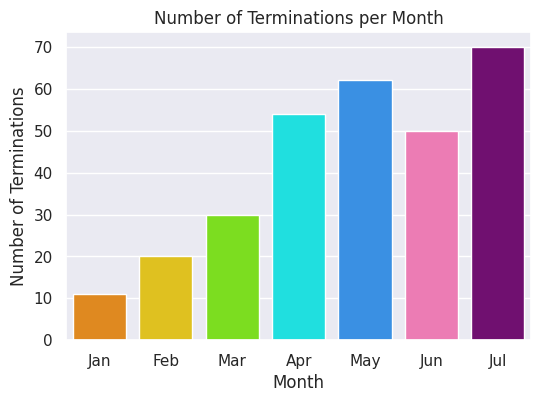

In [533]:
# Define a custom color palette
colors = ['#FF8C00', '#FFD700', '#7CFC00', '#00FFFF', '#1E90FF', '#FF69B4', '#800080']

# Create a bar plot of the number of terminations per month, using the custom color palette
sns.barplot(x='termination_month', y='num_terminations', data=num_terminations, palette=colors)

# Set the title and axis labels
plt.title('Number of Terminations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Terminations')

# Show the plot
plt.show()


In [534]:
num_activation

,activation_month,num_activations
0,2016-05,7
1,2016-06,7
2,2016-09,16
3,2016-11,14
4,2016-12,14
5,2017-01,7
6,2017-03,54
7,2017-04,51
8,2017-05,48
9,2017-06,32


In [535]:
num_activation1 = num_activation.loc[52:58]
num_activation1

,activation_month,num_activations
52,2021-01,74
53,2021-02,59
54,2021-03,76
55,2021-04,26
56,2021-05,40
57,2021-06,61
58,2021-07,14


<ipython-input-536-b5b5c705d7c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_activation1['activation_month'] = num_activation1['activation_month'].astype(str)


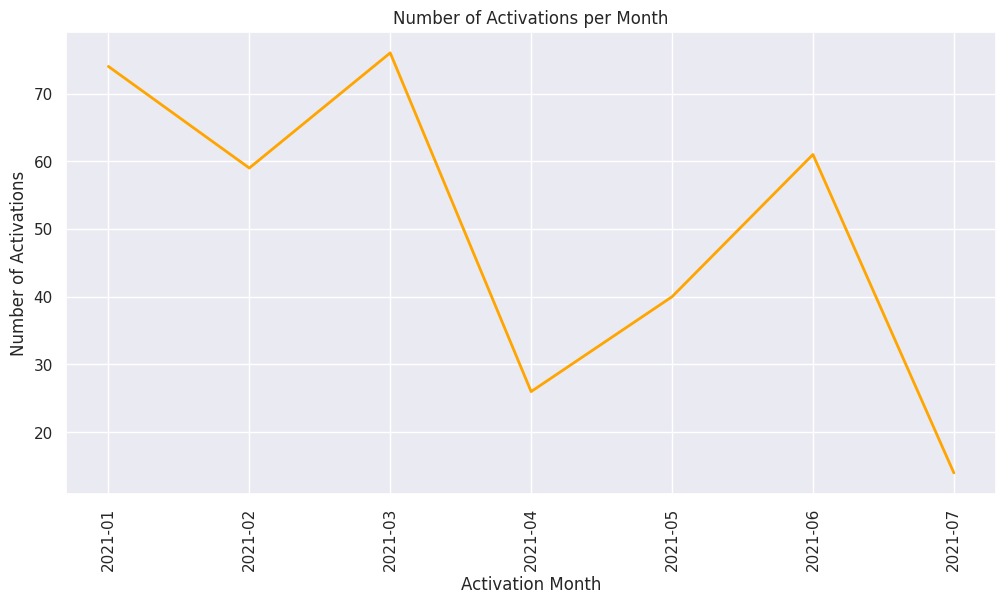

In [536]:
# Convert the activation_month column to a string
num_activation1['activation_month'] = num_activation1['activation_month'].astype(str)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(num_activation1['activation_month'], num_activation1['num_activations'], color='orange', linewidth=2)
plt.xticks(rotation=90)
plt.title('Number of Activations per Month')
plt.xlabel('Activation Month')
plt.ylabel('Number of Activations')
plt.show()

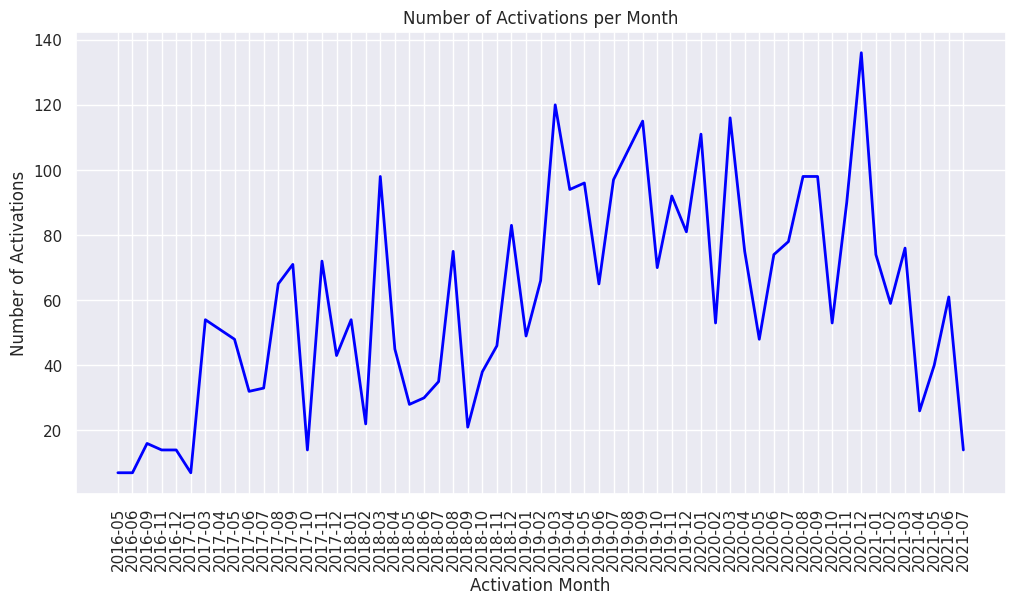

In [537]:
# Convert the activation_month column to a string
num_activation['activation_month'] = num_activation['activation_month'].astype(str)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(num_activation['activation_month'], num_activation['num_activations'], color='blue', linewidth=2)
plt.xticks(rotation=90)
plt.title('Number of Activations per Month')
plt.xlabel('Activation Month')
plt.ylabel('Number of Activations')
plt.show()

# **RESULT VIEW**

In [550]:
FINAL_MONTH_VIEW

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,Activation_Count,Termination_Count
0,Jan,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11
1,Feb,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20
2,Mar,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30
3,Apr,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54
4,May,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62
5,Jun,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50
6,Jul,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70


ADDING TWO COLUMNS

In [551]:
FINAL_MONTH_VIEW1= FINAL_MONTH_VIEW1.assign(Activation_Count=[74,59,76,26,40,61,14], 
               Termination_Count=[11,20,30,54,62,50,70],
               Revenue=[19406.8859,19247.8834,19541.9843,19603.5261,19486.8856,19716.0163,20070.8150])

In [540]:
monthly_revenue_1

,usagemonth,Total bill
0,Jan,19406.8859
1,Feb,19247.8834
2,Mar,19541.9843
3,Apr,19603.5261
4,May,19486.8856
5,Jun,19716.0163
6,Jul,20070.8150


In [552]:
FINAL_MONTH_VIEW1

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,Activation_Count,Termination_Count,Revenue
0,2021-01-01,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,2021-02-01,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,2021-03-01,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,2021-04-01,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,2021-05-01,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,2021-06-01,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,2021-07-01,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [541]:
FINAL_MONTH_VIEW= FINAL_MONTH_VIEW.assign(Activation_Count=[74,59,76,26,40,61,14], 
               Termination_Count=[11,20,30,54,62,50,70])

In [542]:
FINAL_MONTH_VIEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   usagemonth                     7 non-null      object 
 1   Base/Plus_local_data_gb        7 non-null      float64
 2   Base/Plus_local_talktime_mins  7 non-null      float64
 3   Base/Plus_local_SMS/MMS        7 non-null      float64
 4   Base                           7 non-null      float64
 5   Boost                          7 non-null      float64
 6   PayG                           7 non-null      float64
 7   Plus                           7 non-null      float64
 8   Total bill                     7 non-null      float64
 9   current_age                    7 non-null      float64
 10  Activation_Count               7 non-null      int64  
 11  Termination_Count              7 non-null      int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 800.0

In [543]:
FINAL_MONTH_VIEW_merged = pd.merge(FINAL_MONTH_VIEW, monthly_revenue_1, on='usagemonth')

In [544]:
monthly_revenue_1

,usagemonth,Total bill
0,Jan,19406.8859
1,Feb,19247.8834
2,Mar,19541.9843
3,Apr,19603.5261
4,May,19486.8856
5,Jun,19716.0163
6,Jul,20070.8150


In [545]:
FINAL_MONTH_VIEW_merged = FINAL_MONTH_VIEW_merged.rename(columns={'Total bill_x': 'Total bill AVG','Total bill_y': 'Revenue'})

In [546]:
FINAL_MONTH_VIEW_merged = FINAL_MONTH_VIEW_merged.rename(columns={'Total bill': 'Revenue'})

In [547]:
FINAL_MONTH_VIEW_merged

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill AVG,current_age,Activation_Count,Termination_Count,Revenue
0,Jan,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,Feb,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,Mar,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,Apr,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,May,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,Jun,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,Jul,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [554]:
FINAL_MONTH_VIEW1['usagemonth'] = pd.to_datetime(FINAL_MONTH_VIEW1['usagemonth'])

In [555]:
FINAL_MONTH_VIEW1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   usagemonth                     7 non-null      datetime64[ns]
 1   Base/Plus_local_data_gb        7 non-null      float64       
 2   Base/Plus_local_talktime_mins  7 non-null      float64       
 3   Base/Plus_local_SMS/MMS        7 non-null      float64       
 4   Base                           7 non-null      float64       
 5   Boost                          7 non-null      float64       
 6   PayG                           7 non-null      float64       
 7   Plus                           7 non-null      float64       
 8   Total bill                     7 non-null      float64       
 9   current_age                    7 non-null      float64       
 10  Activation_Count               7 non-null      int64         
 11  Termination_Count      

# Fore Casting

In [556]:
final_df1.columns

Index(['usagemonth', 'cust_no', 'Base/Plus_local_data_gb',
       'Base/Plus_local_talktime_mins', 'Base/Plus_local_SMS/MMS', 'Base',
       'Boost', 'PayG', 'Plus', 'Total bill', 'current_age',
       'activation_month', 'termination_month', 'portin_telco',
       'portout_telco', 'flag_local_singaporean'],
      dtype='object')

In [557]:
final_df1

,usagemonth,cust_no,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,activation_month,termination_month,portin_telco,portout_telco,flag_local_singaporean
0,2021-01-01,2,158.159102,48.5,4,28.0,NaN,NaN,20.0,48.0,20,202009,NaN,m1,NaN,local
1,2021-01-01,3,0.085322,9.0,1,28.0,NaN,NaN,NaN,28.0,19,202012,NaN,new number,NaN,local
2,2021-01-01,6,4.637422,160.5,0,28.0,NaN,0.3,2.0,30.3,27,201707,NaN,new number,NaN,local
3,2021-01-01,7,3.419053,38.5,0,28.0,NaN,NaN,2.0,30.0,34,201902,NaN,new number,NaN,non-local
4,2021-01-01,8,14.957637,35.5,1,28.0,NaN,NaN,NaN,28.0,25,201812,NaN,new number,NaN,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,2021-07-01,989,8.840020,337.0,0,NaN,NaN,28.0,NaN,28.0,33,202009,NaN,new number,NaN,local
3550,2021-07-01,990,29.295146,96.0,2,NaN,NaN,28.0,20.0,48.0,24,201902,NaN,starhub,NaN,local
3551,2021-07-01,995,70.435713,132.0,7,NaN,NaN,42.0,22.0,64.0,24,201708,NaN,new number,NaN,non-local
3552,2021-07-01,996,0.667500,25.0,0,NaN,NaN,28.0,NaN,28.0,56,202103,NaN,starhub,NaN,local


In [ ]:
pip install --upgrade pip

In [ ]:
!pip install prophet


In [ ]:
%pip install prophet


In [147]:
from prophet import Prophet

In [558]:
FINAL_MONTH_VIEW1

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill,current_age,Activation_Count,Termination_Count,Revenue
0,2021-01-01,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,2021-02-01,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,2021-03-01,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,2021-04-01,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,2021-05-01,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,2021-06-01,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,2021-07-01,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [ ]:
df['usagemonth'] = pd.to_datetime(df['usagemonth'], format='%b-%Y')

In [573]:
df = FINAL_MONTH_VIEW1
df

,ds,local_data,local_talktime,local_SMS_MMS,Base,Boost,PayG,Plus,total_bill_avg,current_age,Activation_Count,Termination_Count,Revenue
0,2021-01-01,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,2021-02-01,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,2021-03-01,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,2021-04-01,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,2021-05-01,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,2021-06-01,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,2021-07-01,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [560]:
FINAL_MONTH_VIEW_merged

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill AVG,current_age,Activation_Count,Termination_Count,Revenue
0,Jan,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,Feb,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,Mar,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,Apr,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,May,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,Jun,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,Jul,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [575]:
df0 = FINAL_MONTH_VIEW1

# Then, let's preprocess the data to be suitable for Prophet:
# Convert 'usagemonth' column to datetime format
# df0['usagemonth'] = pd.to_datetime(df0['usagemonth'])

# Rename columns to remove special characters
df0.columns = ['ds', 'local_data', 'local_talktime', 'local_SMS_MMS', 'Base', 'Boost', 'PayG', 'Plus', 'total_bill_avg', 'current_age', 'Activation_Count', 'Termination_Count', 'Revenue']

# Create a new dataframe for forecasting, which includes the columns we want to forecast (total_bill_avg), and the date column (ds)
forecast_df = df0[['ds', 'Revenue']].copy()

# Rename the columns to fit Prophet's input requirements
forecast_df.columns = ['ds', 'y']


In [576]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7 non-null      datetime64[ns]
 1   y       7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [577]:
model = Prophet(changepoint_prior_scale=0.05,
                seasonality_prior_scale=5,
                interval_width=0.8,
                n_changepoints=25)
model.fit(forecast_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpey3zxi02/ukt2vfox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpey3zxi02/3ylaxtc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45698', 'data', 'file=/tmp/tmpey3zxi02/ukt2vfox.json', 'init=/tmp/tmpey3zxi02/3ylaxtc6.json', 'output', 'file=/tmp/tmpey3zxi02/prophet_model5cuzfuvb/prophet_model-20230424083224.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:32:24 - cmdstanpy - INFO - Chain [1] start processing
INF

In [578]:
# Create a new dataframe with the next 6 months
future = model.make_future_dataframe(periods=6, freq='MS')

# Finally, let's make the predictions:

# Make the predictions for the next 6 months
forecast = model.predict(future)


In [579]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [585]:
forecast=forecast[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'yhat']]
forecast.rename(columns = {'ds':'Months','yhat_lower':'Lower_Revenue','yhat_upper':'Upper_Revenue','trend_lower':'Lower Trend','trend_upper':'Lower Trend','yhat':'Revenue'}, inplace = True)

<ipython-input-585-11bf1e897d30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast.rename(columns = {'ds':'Months','yhat_lower':'Lower_Revenue','yhat_upper':'Upper_Revenue','trend_lower':'Lower Trend','trend_upper':'Lower Trend','yhat':'Revenue'}, inplace = True)


In [586]:
forecast

,Months,trend,Lower_Revenue,Upper_Revenue,Lower Trend,Lower Trend,Revenue
0,2021-01-01,19404.182951,19377.186994,19431.141995,19404.182951,19404.182951,19404.182951
1,2021-02-01,19256.535670,19226.987646,19283.440791,19256.535670,19256.535670,19256.535670
2,2021-03-01,19536.010658,19508.231055,19563.327581,19536.010658,19536.010658,19536.010658
3,2021-04-01,19597.950025,19569.162382,19625.905452,19597.950025,19597.950025,19597.950025
4,2021-05-01,19470.754728,19443.502947,19497.528565,19470.754728,19470.754728,19470.754728
5,2021-06-01,19762.893624,19735.332168,19790.685871,19762.893624,19762.893624,19762.893624
6,2021-07-01,20045.608684,20018.308846,20072.255850,20045.608684,20045.608684,20045.608684
7,2021-08-01,20337.747580,20137.838583,20538.468520,20142.869529,20535.740798,20337.747580
8,2021-09-01,20629.886476,20011.963514,21278.632676,19994.137612,21276.523175,20629.886476
9,2021-10-01,20912.601537,19627.664755,22179.945623,19624.869289,22174.210834,20912.601537


In [581]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          13 non-null     datetime64[ns]
 1   trend                       13 non-null     float64       
 2   yhat_lower                  13 non-null     float64       
 3   yhat_upper                  13 non-null     float64       
 4   trend_lower                 13 non-null     float64       
 5   trend_upper                 13 non-null     float64       
 6   additive_terms              13 non-null     float64       
 7   additive_terms_lower        13 non-null     float64       
 8   additive_terms_upper        13 non-null     float64       
 9   multiplicative_terms        13 non-null     float64       
 10  multiplicative_terms_lower  13 non-null     float64       
 11  multiplicative_terms_upper  13 non-null     float64       
 

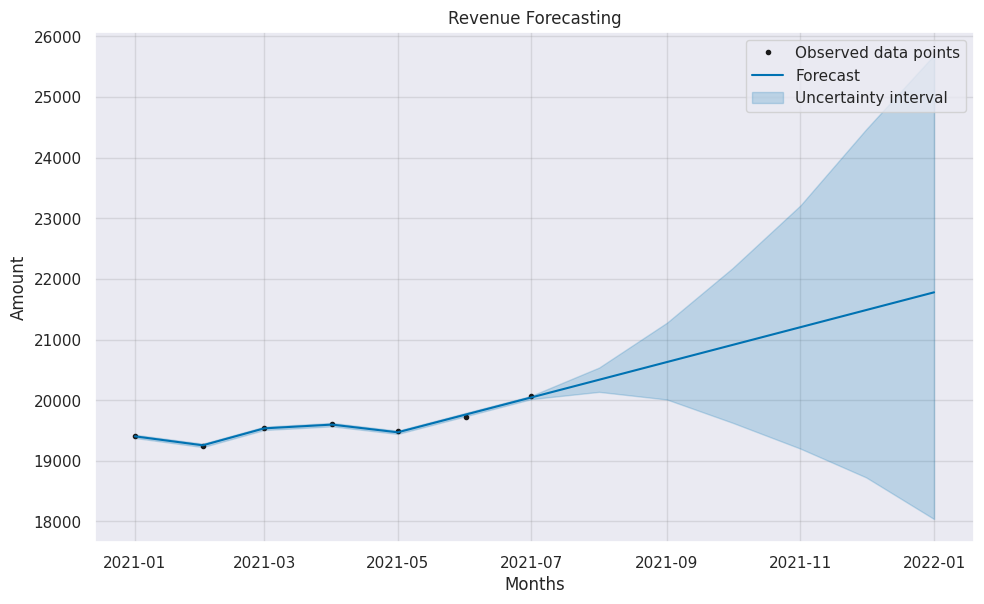

In [582]:
# Plot the forecast
fig = model.plot(forecast)
plt.legend()  # add a legend
plt.title('Revenue Forecasting')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-01-01 to 2021-07-01
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   local_data         7 non-null      float64
 1   local_talktime     7 non-null      float64
 2   local_SMS_MMS      7 non-null      float64
 3   Base               7 non-null      float64
 4   Boost              7 non-null      float64
 5   PayG               7 non-null      float64
 6   Plus               7 non-null      float64
 7   total_bill_avg     7 non-null      float64
 8   current_age        7 non-null      float64
 9   Activation_Count   7 non-null      int64  
 10  Termination_Count  7 non-null      int64  
 11  Revenue            7 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 728.0 bytes


In [587]:
alpha = FINAL_MONTH_VIEW1
alpha

,ds,local_data,local_talktime,local_SMS_MMS,Base,Boost,PayG,Plus,total_bill_avg,current_age,Activation_Count,Termination_Count,Revenue
0,2021-01-01,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,2021-02-01,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,2021-03-01,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,2021-04-01,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,2021-05-01,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,2021-06-01,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,2021-07-01,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [584]:
alpha.columns

Index(['ds', 'local_data', 'local_talktime', 'local_SMS_MMS', 'Base', 'Boost',
       'PayG', 'Plus', 'total_bill_avg', 'current_age', 'Activation_Count',
       'Termination_Count', 'Revenue'],
      dtype='object')

In [588]:
# X1 = alpha.drop(('usagemonth'), axis=1)
X1=alpha.drop(['Revenue', 'ds'], axis=1)

In [589]:
X1.columns

Index(['local_data', 'local_talktime', 'local_SMS_MMS', 'Base', 'Boost',
       'PayG', 'Plus', 'total_bill_avg', 'current_age', 'Activation_Count',
       'Termination_Count'],
      dtype='object')

In [591]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Split data into features (X) and target variable (y)
# X = alpha.drop('Revenue'), axis=1)
y = alpha['Revenue']

# Train a random forest regression model
rf = RandomForestRegressor()
rf.fit(X1, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': X1.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index()

feature_importances

,index,Feature,Importance
0,5,PayG,0.176221
1,6,Plus,0.159106
2,10,Termination_Count,0.134607
3,4,Boost,0.091613
4,9,Activation_Count,0.085833
5,7,total_bill_avg,0.078489
6,1,local_talktime,0.070029
7,2,local_SMS_MMS,0.060192
8,8,current_age,0.057778
9,3,Base,0.046652


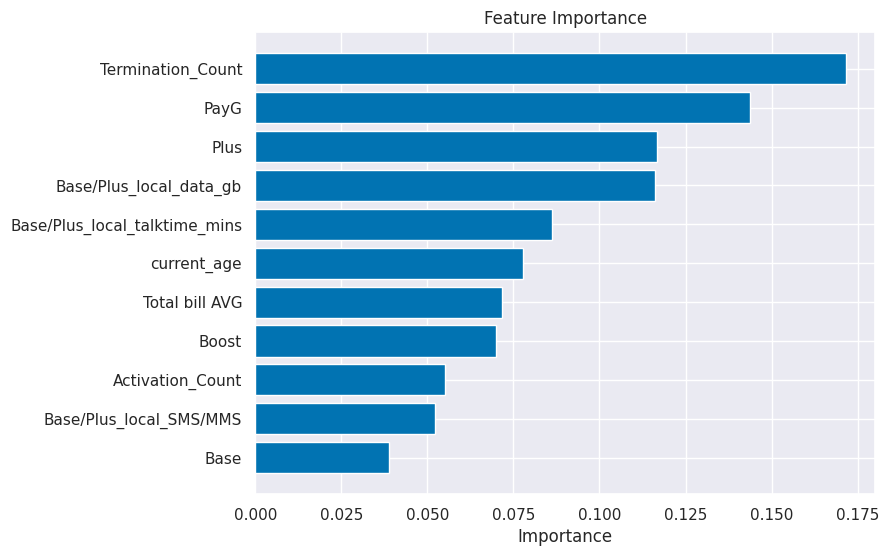

In [592]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
features = ['Termination_Count', 'PayG', 'Plus', 'Base/Plus_local_data_gb',             'Base/Plus_local_talktime_mins', 'current_age', 'Total bill AVG',             'Boost', 'Activation_Count', 'Base/Plus_local_SMS/MMS', 'Base']
importances = [0.171578, 0.143659, 0.116766, 0.116016, 0.086335,                0.077748, 0.071754, 0.069791, 0.055260, 0.052201, 0.038891]

# Create horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(features))
ax.barh(y_pos, importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')

plt.show()


# New section

In [437]:
data=FINAL_MONTH_VIEW_merged
data

,usagemonth,Base/Plus_local_data_gb,Base/Plus_local_talktime_mins,Base/Plus_local_SMS/MMS,Base,Boost,PayG,Plus,Total bill AVG,current_age,Activation_Count,Termination_Count,Revenue
0,2021-01-01,22.925448,120.219384,3.135189,28.171080,23.076962,6.583774,14.943522,38.659135,36.721670,74,11,19406.8859
1,2021-02-01,21.869797,109.621178,2.415170,4.846158,11.583358,28.945766,15.033334,38.495767,36.696607,59,20,19247.8834
2,2021-03-01,25.101206,120.386837,2.978389,4.846158,9.777800,28.787369,15.284769,38.468473,36.768173,76,30,19541.9843
3,2021-04-01,24.302196,127.048515,2.722772,4.453846,13.285743,28.947868,15.551155,38.895885,36.649505,26,54,19603.5261
4,2021-05-01,25.005376,133.098410,2.582505,3.736776,20.428657,28.702123,15.619355,38.818497,36.948310,40,62,19486.8856
5,2021-06-01,23.691603,132.122626,2.610895,3.762322,14.000022,28.556496,15.458599,38.432780,36.772374,61,50,19716.0163
6,2021-07-01,24.370751,131.831252,2.658960,3.904762,14.733333,28.972616,15.657895,38.746747,36.892100,14,70,20070.8150


In [594]:
forecast

,Months,trend,Lower_Revenue,Upper_Revenue,Lower Trend,Lower Trend,Revenue
0,2021-01-01,19404.182951,19377.186994,19431.141995,19404.182951,19404.182951,19404.182951
1,2021-02-01,19256.535670,19226.987646,19283.440791,19256.535670,19256.535670,19256.535670
2,2021-03-01,19536.010658,19508.231055,19563.327581,19536.010658,19536.010658,19536.010658
3,2021-04-01,19597.950025,19569.162382,19625.905452,19597.950025,19597.950025,19597.950025
4,2021-05-01,19470.754728,19443.502947,19497.528565,19470.754728,19470.754728,19470.754728
5,2021-06-01,19762.893624,19735.332168,19790.685871,19762.893624,19762.893624,19762.893624
6,2021-07-01,20045.608684,20018.308846,20072.255850,20045.608684,20045.608684,20045.608684
7,2021-08-01,20337.747580,20137.838583,20538.468520,20142.869529,20535.740798,20337.747580
8,2021-09-01,20629.886476,20011.963514,21278.632676,19994.137612,21276.523175,20629.886476
9,2021-10-01,20912.601537,19627.664755,22179.945623,19624.869289,22174.210834,20912.601537


Text(0, 0.5, 'Amount')

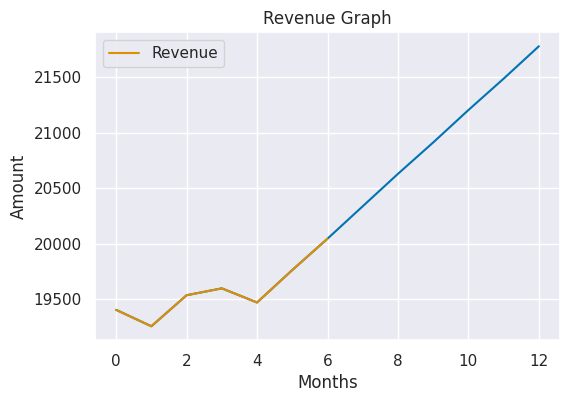

In [605]:
#Comparing the actual referrals to predicted referrals
forecast['Revenue'].plot()
forecast['Revenue'][:-6].plot(legend=True)
plt.title('Revenue Graph')
plt.xlabel('Months')
plt.ylabel('Amount')